In [43]:
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import glob


%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14,'font.family':'Arial','font.weight':'bold','figure.dpi':200})

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from IPython.display import display
from ipywidgets import *


def full(w,hideDes=False):
    for i in w.children:
        i.layout.width='100%'
        if hideDes:
            i.description = ''
    return w

def doIT(f,*args,**kwargs):
    display(full(interactive(f,*args,**kwargs)))

In [44]:
import SerialEquipment as se

In [45]:
lksr = se.Lakeshore('COM3')

In [47]:
float(lksr.getTemp())

293.26

In [46]:
lksr.cmd('*IDN?')

'LSCI,MODEL325,LSA19GB,1.8/1.1'

In [48]:
lksr.isStable()

True

In [73]:
BB = se.CI_SR200('COM5')
print(BB.cmd('*IDN?'))
print(BB.getTemp())
print(BB.isStable())

*Command Error**IDN?*
150
1


In [59]:
print(BB.cmd('GETNUMBEROFAXES'))
print(BB.cmd('SETACTIVEAXIS 1'))
print(BB.cmd('GETTARGETLIST'))
print(BB.cmd('SETACTIVEAXIS 2'))
print(BB.cmd('GETTARGETLIST'))

2,Axis1,Axis2

T01,T1:PH 22.2mm,T02,T2:PH 15.9mm,T03,T3:PH 12.7mm,T04,T4:PH 9.5mm,T05,T5:PH 6.4mm,T06,T6:PH 3.2mm,T07,T7:PH 1.6mm,T08,T8:PH 0.8mm

F01,F1:EMPTY,F02,F2:EMPTY,F03,F3:EMPTY,F04,F4:EMPTY,F05,F5:EMPTY,F06,F6:EMPTY,F07,F7:EMPTY,F08,F8:EMPTY


In [69]:
A = 1
BB.cmd('SETACTIVEAXIS 1')
BB.cmd('SETTARGET %d'%A)
while BB.cmd('GETAXISSTATUS') != '0':
    print('moving...')
print(BB.cmd('RA'))

moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
1


In [66]:
F = 3
BB.cmd('SETACTIVEAXIS 2')
BB.cmd('SETTARGET %d'%F)
while BB.cmd('GETAXISSTATUS') != '0':
    print('moving...')
print(BB.cmd('RA'))

moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
3


In [60]:
BB.cmd('SETACTIVEAXIS 1')
BB.cmd('RA')

'1'

In [76]:
BB.setAperture(1)

moving to aperture: 1
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...
moving...


'1'

In [72]:
import importlib as imp
imp.reload(se)


smu=se.Keithley2400('COM4',timeout=10)

In [930]:
smu.I_Sense_V_Source_Configure()

'*RST\rTRIG:SOUR IMM\rSENS:FUNC:CONC OFF\rSENS:FUNC "CURR"\rSOUR:FUNC VOLT\rSOUR:CLE:AUTO Off\rTRIG:COUN 10\rTRIG:DEL 0\rSOUR:DEL 0.001\rROUT:TERM REARSYST:AZER:STAT ON\rSENS:CURR:PROT 20.000E-3\rSENS:CURR:NPLC 1.000\rSYST:RSEN Off\rSENS:CURR:RANG:AUTO On'

In [931]:
smu.IV_Sweep_Config(step=.1,count=1,port='FRONT')

''

In [932]:
#smu.poll('READ?')
print(smu.poll('*IDN?'))
print(smu.ask('*IDN?'))

KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M
KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M


In [928]:
smu.ask('*RST\rFORM:ELEM CURR, VOLT\rOUTP OFF\rMEAS?')

''

In [949]:
import time
t1 = time.time()
a = smu.ask('*IDN?')
t2 = time.time()
print(a,'\n',t2-t1)
t1 = time.time()
a = smu.poll('*IDN?')
t2 = time.time()
print(a,'\n',t2-t1)


KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M 
 0.3749961853027344
KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M 
 0.23649120330810547


In [950]:
smu.poll('INIT\rFETCH?',delay=.01)

'-1.000000E+00,-2.138858E-04'

In [951]:
smu.ask('INIT\rFETCH?')

'-1.000000E+00,-2.138860E-04'

In [938]:
smu.poll('READ?')

'-1.000000E+00,-2.138906E-04'

In [1062]:
iv = np.array(smu.keithleyDiode().split(','))
print(iv)

['+9.992082E-01' '+1.000000E-03' '+9.910000E+37' '+8.102075E+04'
 '+3.585200E+04']


In [1009]:
iv = iv.astype(float).reshape((10,5))
print(iv)

ValueError: cannot reshape array of size 5 into shape (10,5)

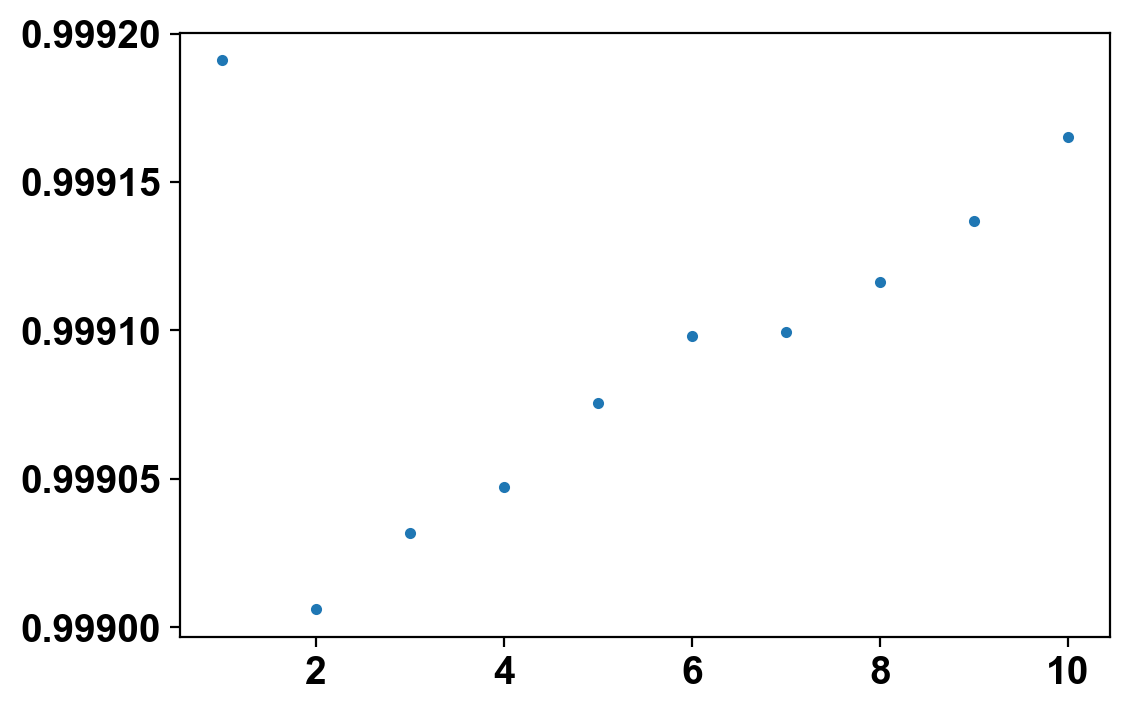

In [902]:
plt.plot(iv[:,1]*1000,iv[:,0],'.')

In [1017]:
smu.write('*RST')

''

In [1018]:
smu.ask('MEAS?')

'+0.000000E+00,-3.881223E-07,+9.910000E+37,+8.027387E+04,+2.150800E+04'

In [1024]:
smu.poll('READ?')

',+3.000000E-02,+6.379660E-06,+4.000000E-02,+8.518981'

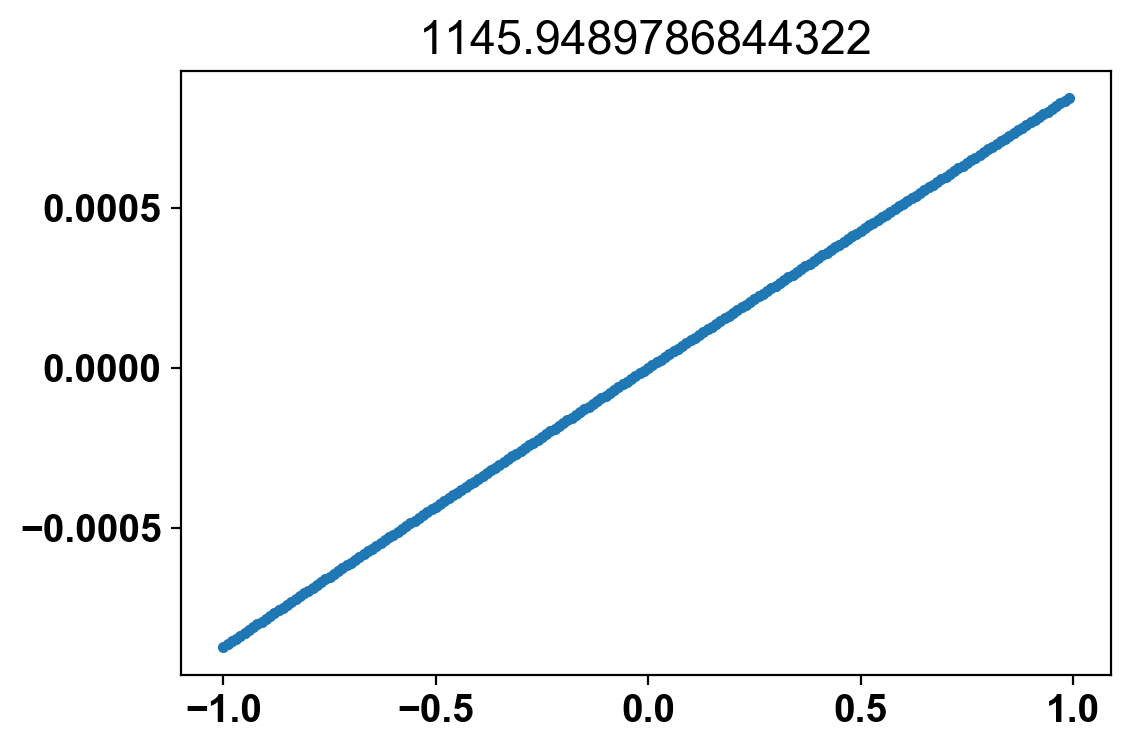

In [1078]:
strt=-1
stop=-strt
step=.01
count=abs((strt-stop)//step)
data = smu.IV_Sweep_Config(port='REAR',step=step,start=strt,stop=stop,trg_delay=0,count=count)
try:
    data = np.array(data.split(',')).astype(float)
    data = data.reshape((len(data)//2,2))
    plt.plot(data[:,0],data[:,1],'.')
    plt.title(data[0,0]/data[0,1])
except:
    print(data.split(','))

In [1076]:
dark2 = data

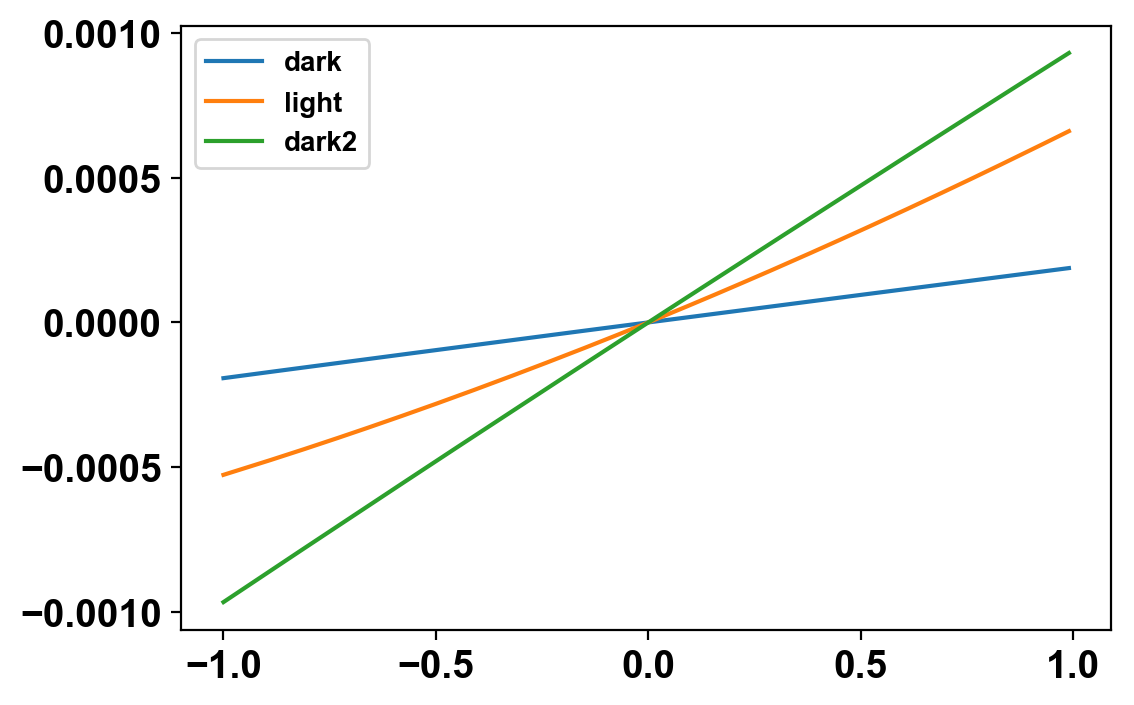

In [1077]:
plt.plot(dark[:,0],dark[:,1],label='dark')
plt.plot(light[:,0],light[:,1],label='light')
plt.plot(dark2[:,0],dark2[:,1],label='dark2')
plt.legend(loc='best',prop={'size':10})

In [999]:
smu.write('*RST\r*CLS')

In [963]:
smu.ask('*ESE?')

'1'

In [964]:
smu.write('*ESE 0')

In [1006]:
print(smu.ask('*STB?'))
print(smu.ask('*ESE?'))
print(smu.ask('*SRE?'))

20
1
32


In [1050]:
smu.ask('*IDN?')

'KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M'

In [986]:
smu.write('LOC')

In [1046]:
smu.poll('INIT\rFETCH?')

'-1.000000E-01,-2.142700E-05'

In [1085]:
smu.poll('FORM:ELEM VOLT, CURR, TIME\rMEAS?')

'-1.000000E+00,-7.857168E-04,+8.212499E+04'

In [1089]:
stdErr= 'SYST:ERR?\r*ESR?\rSTAT:OPER?\rSTAT:MEAS?\rSTAT:QUES?'
out = smu.poll(stdErr).split('\r')
for i,j in zip(stdErr.split('\r'),out):
    print(i,j)

SYST:ERR? 0,"No error"
*ESR? 0
STAT:OPER? 1096
STAT:MEAS? 64
STAT:QUES? 0


In [1054]:
smu.write(stdErr)

In [1079]:
smu.ask(stdErr)

'-104,"Data type error"'

In [1087]:
d = np.array([np.array(smu.poll('FORM:ELEM VOLT, CURR, TIME\rMEAS?').split(',')).astype(float) for i in range(1000)])

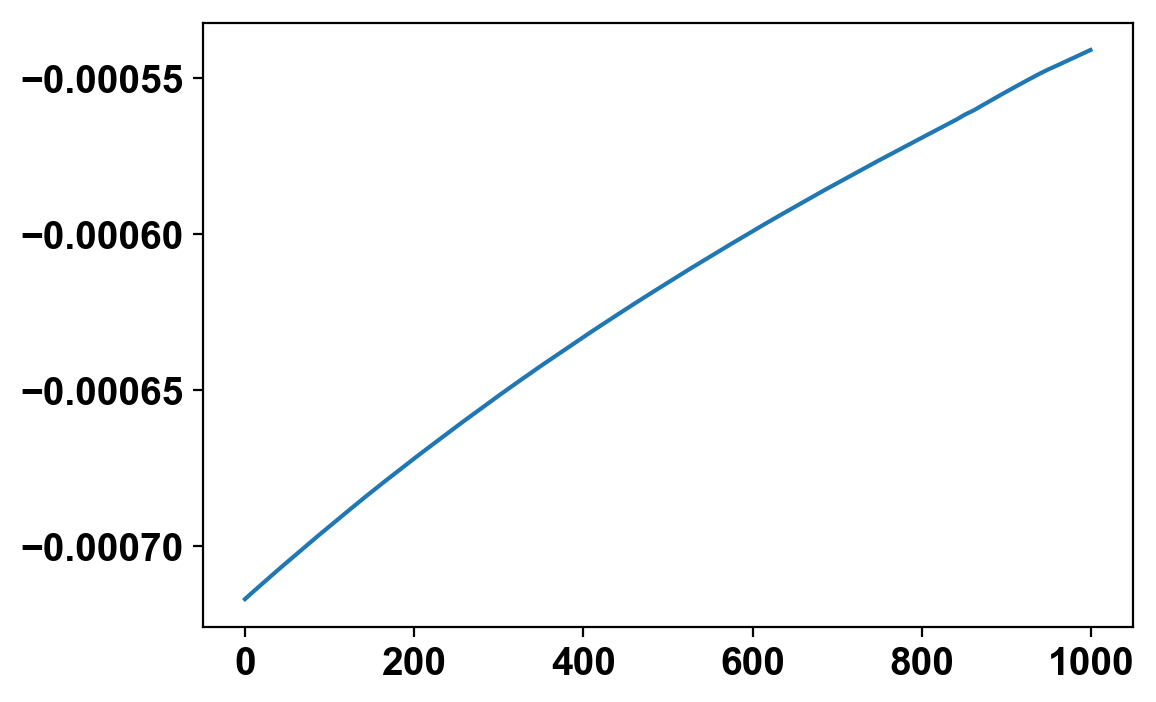

In [1088]:
plt.plot(d[:,1])